# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [12]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# read the data
df = pd.read_csv('DATA/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1898
Number of columns: 9


#### Observations:
From the number of columns and rows, we can say that there is a good number of information available for each food order, allowing me to do further analysis.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [13]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
it appears that the data is full with no missing value and from the integer values i can see that it can help me to analyze time related aspects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
this indicates that there are no missing values in the data frame. Each column has the same number of non-null values as the number of rows in the data frame( 1898), meaning there are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Based on the observations, there are 1898 observations in total. 25% of the observations have a cost of 12.08 or less, have no rating, take 23 minutes or less to prepare and 20 minutes or less to deliver. around 50% of the values are below 14,4,and 25 for (cost, rating, preparation time, delivery time respectively).

### **Question 5:** How many orders are not rated? [1 mark]

In [20]:
df['rating'].value_counts(dropna=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
there are 735 orders not rated 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

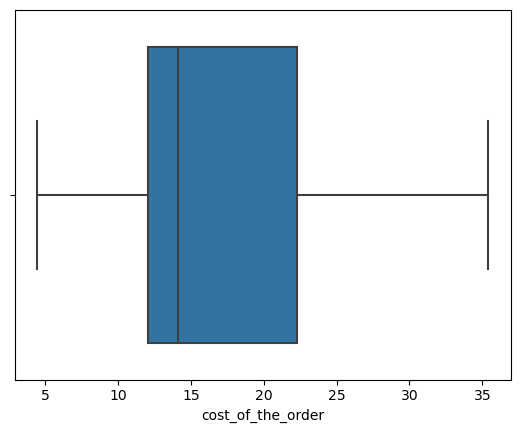

In [60]:
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

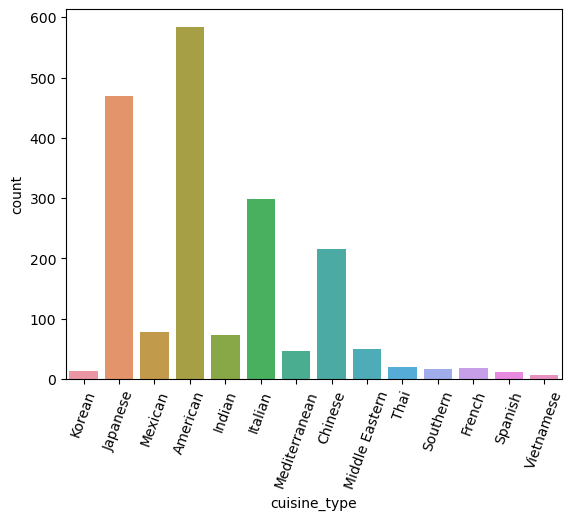

In [109]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=70)
plt.show()

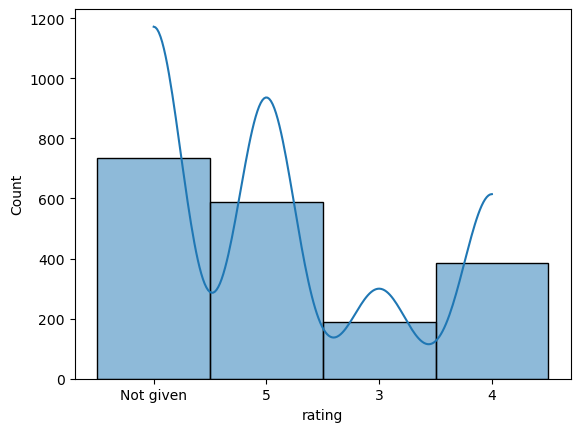

In [50]:
Abdullahdata = df[df['rating']!= 0]

sns.histplot(data = Abdullahdata, x='rating',bins = 4,stat = 'count',kde = True)
plt.show()

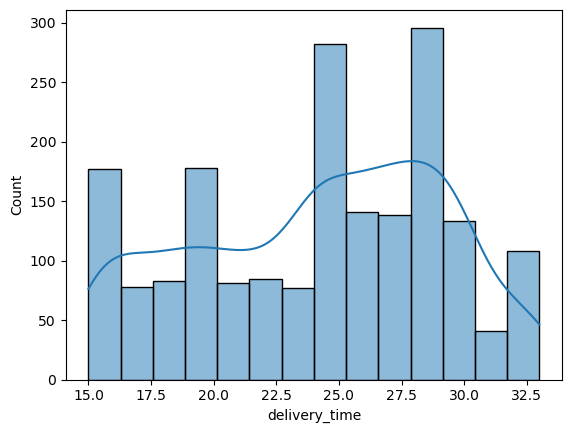

In [59]:
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()

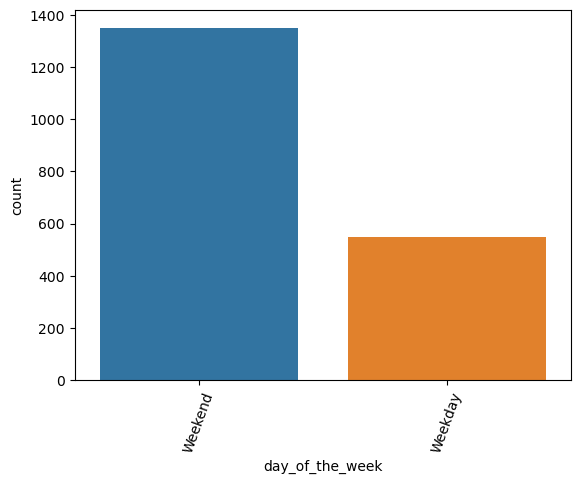

In [108]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=70)
plt.show()

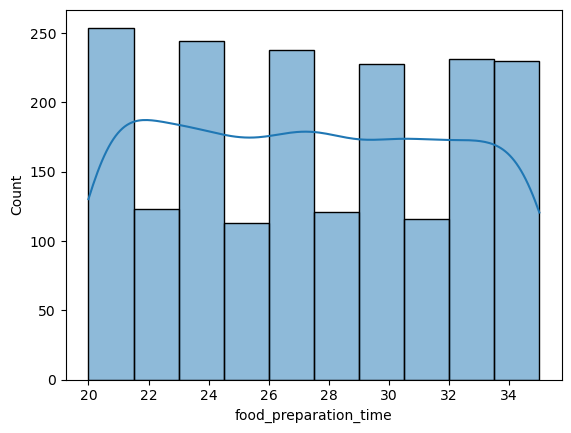

In [58]:
sns.histplot(data = df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
shake shack is top resturant in the number of orders and parm is the 5th top resturant reciveing orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
American food is popular on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# Do a count of total orders
total_observations = df['cost_of_the_order'].count()
# Do a count of orders with cost above $20
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
# Compute the percent of the orders above $20
percentage_above20 = round((orders_above20/total_observations)*100,2) # Rounded to two decimal places
percentage_above20

29.24

## Observations:
29% of orders cost more than 20$

### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# We could easily pick the information from the df.describe() statistical summary but we can arrive at the same as below

avr_del_time = round(df[['delivery_time']].agg('mean'),2) # Rounded to two decimal places
print(avr_del_time)

delivery_time    24.16
dtype: float64


#### Observations:
24 min is the average for order to be delivered 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations:
we can notice that customer 52832 is the top frequent customer we can study his approch buying food to make it easier for others which can make others also do like him

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


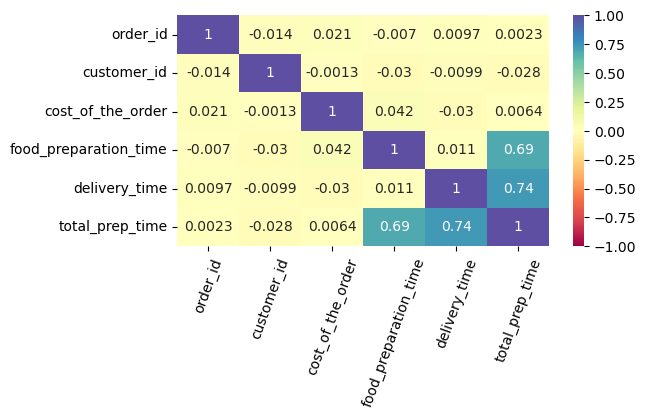

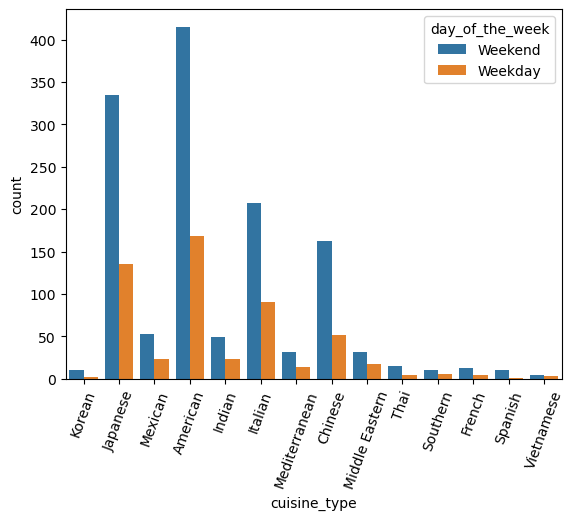

In [107]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.xticks(rotation=70)
plt.show()

sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=70)
plt.show()


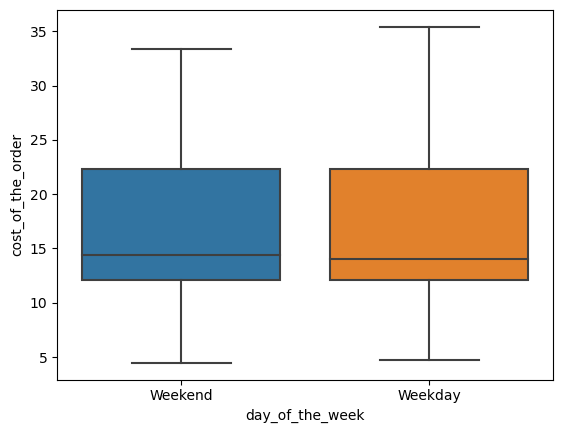

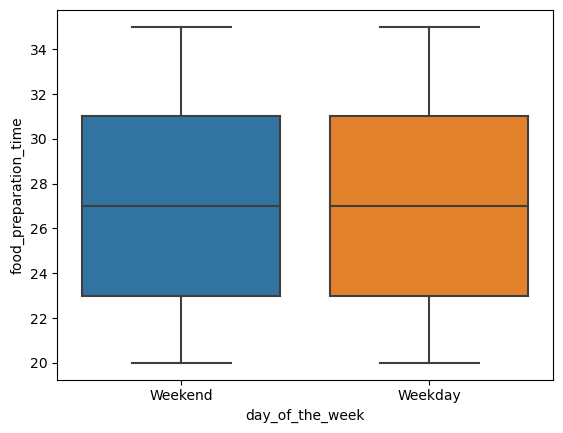

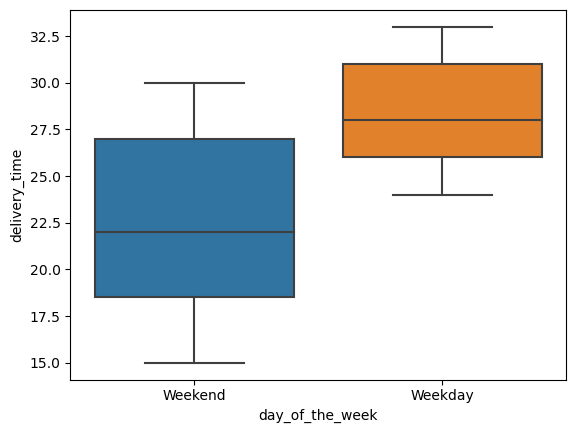

In [110]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

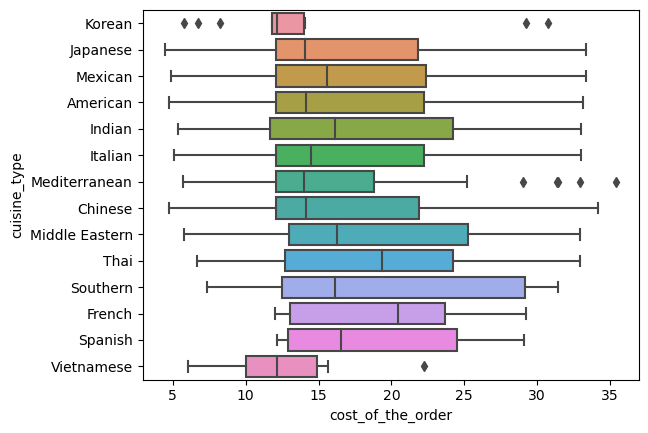

In [112]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=0)
plt.show();

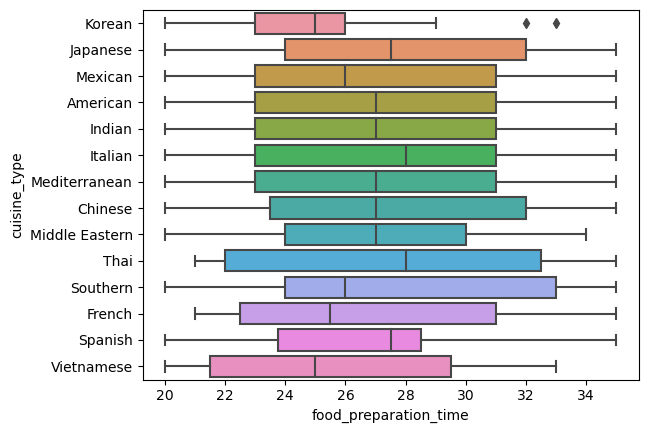

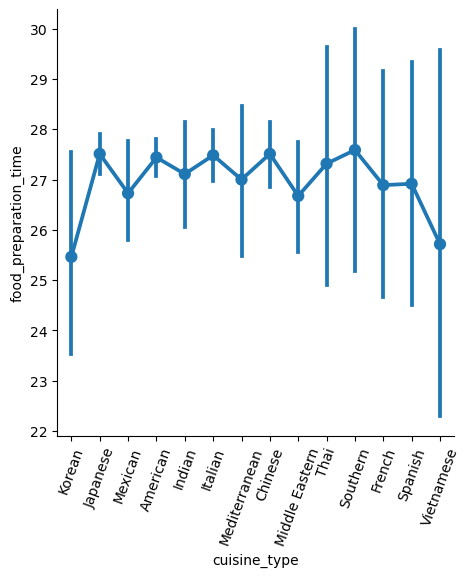

In [114]:
sns.boxplot(data=Abdullahdata,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=70)
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [166]:
data = data[data['rating'] != 'Not given']

grouped_data = data.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

grouped_data.columns = ['rating_count', 'avg_rating']

filtered_data = grouped_data[(grouped_data['rating_count'] > 50) & (grouped_data['avg_rating'] > 4)]

print(filtered_data)

                           rating_count     avg_rating
restaurant_name                                       
Blue Ribbon Fried Chicken            64   5.552274e+61
Blue Ribbon Sushi                    73   6.089773e+70
Shake Shack                         133  4.177018e+130
The Meatball Shop                    84   6.494697e+81


#### Observations:
these resturant qualify for the promotional offer and i think name of blue ribbon can give you more good ratings.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [1]:
resturant_revenue = 0
resturant_cost = pd.Series(df['cost_of_the_order'])

for i in range(len(resturant_cost)):
    if (resturant_cost[i] > 5) & (resturant_cost[i] <= 20):
        resturant_income = resturant_cost[i]*0.15
    elif (resturant_cost[i] > 20):
        resturant_income = resturant_cost[i]*0.25
    else:
        resturant_income = 0
    resturant_revenue = resturant_revenue + resturant_income

NameError: name 'pd' is not defined

In [22]:
print("The total revenue generated by the company across all orders is: $",resturant_revenue)

The total revenue generated by the company across all orders is: $ 6166.302999999994


#### Observations:
FoodHub collected a total of $ 6166.303$ for the orders given

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
df['total_prep_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [29]:
total_observations = df['total_prep_time'].count()
ordertime_above60 = df[df['total_prep_time'] > 60].shape[0]
percent_above60 = round((ordertime_above60/total_observations)*100,2)
print("The percentage of orders taking more than 60 minutes is: ", percent_above60, "%")

The percentage of orders taking more than 60 minutes is:  10.54 %


#### Observations:  
food orders taking 60 min is 10.5% which is small percentage comparing with 100%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [31]:
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:
there are fewer orders over the weekdays compared to weekends. maybe because roads are busy because people working in weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Most customers are very happy with the service but many don't rate it.
* Orders tend to cost around 13 doolars  and  25 dollars .
* Popularity of food doesn't change much during the week but more orders are made during weekends.
* Food preparation time is consistent but delivery time varies.
* There's a tie for a reward and it needs further analysis.

### Recommendations:

* Get more customers to rate their orders.
* Investigate why some customers pay more than others.
* Focus on weekday marketing to boost sales.
* Investigate ways to make delivery faster.
* Consider a tie-breaker for promotional offers to be fair.

---